## Objetive

This notebook aims to show how to calculate the most famous metrics starting from a confusion matrix. Here are the metrics and their formulas:




\begin{align} Recall = \frac{TP}{TP + FN}
    \end{align}
    \
\begin{align} Specificity = \frac{TN}{TN + TN}
    \end{align}
    \
\begin{align} Precision = \frac{TP}{TP + FP}
    \end{align}
    \
\begin{align} Accuracy = \frac{TP + TN}{TP+TN+FP+FN}
    \end{align}
    \
\begin{align} F-Score = 2 * \frac{Precision * Recall}{Precision + Recall}
    \end{align}
    \

Where:

*   $TP = True \ Positives$ (The afirmative prediction made by the model corresponds to the reality, or simply "the model said it was something and it really was");

*   $TN = True \ Negative$ (The model said that nothing was there or that input doens't belong to a specific class and it corresponds to the reality);

*   $FN = False \ Negative$ (the oposite of TN); and

*   $FP = False \ Positive$ (the oposite of TP).



First of all, there is nothing amazing in this notebook in terms of coding... Our focus is to debate and share a few thoughts about the metrics and the context in which our confusion matrix was obtained.

---

## Context

A quick context for this study: in Brazil, there are several illegal activities happening at the Amazon Rainforest (or just "Amazonia"). Everything from illegal gold mining, drugs traffic and slavery happen there.

All of this activity demands a huge logistic! Rivers, roads and even runways can be used to delivery products. We will focus on the aerial transport.

For a plane to take off, it needs a runway. So a way to spot illegal activities is throught detectin illegal (or "non registered") runways made of dirt of grass at the Amazonia.

In this [paper](https://ieeexplore.ieee.org/document/10648797) our friend was able to achieve amazing results at this task of detecting illegal runways. So, we used all of his affirmative predictions (or detections) and tried to filter even more, because despite his results being amazing, there was still plenty (numerically speaking) of FP.



So, the following model was trained and tested:

![image.png](

Details of the training will not be addressed here since it is not our main objective.

The confusion matrix was obtained as follows:

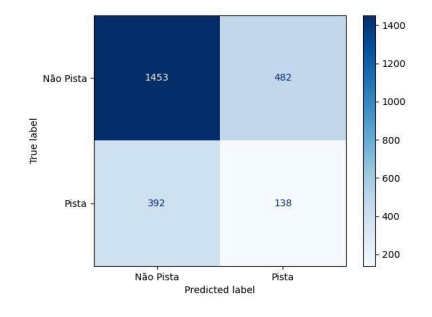


Where:

"Pista" = image with a runway(s) (positive detection).

"Não Pista" = image without runway(s).

So, from our matrix, we can infer:

\begin{align}
    TP = 138 \\
    TN = 1453 \\
    FP = 392 \\
    FN = 482
  \end{align}

In [1]:
TP = 138
TN = 1453
FP = 392
FN = 482

In [2]:
recall = TP / (TP + FN)
specificity = TN / (FP + TN)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)

In [3]:
f_score = 2 * (precision*recall) / (precision+recall)

In [8]:
print(f'Metrics: \n Recall = {recall:.3f} \n Specificity = {specificity:.3f} \n Accuracy = {accuracy:.3f} \n Precision = {precision:.3f} \n F-Score = {f_score:.3f}')

Metrics: 
 Recall = 0.223 
 Specificity = 0.788 
 Accuracy = 0.645 
 Precision = 0.260 
 F-Score = 0.240


---

## Discussion

After performing our metrics calculation, here comes some thoughts:

We can see that our model performs much better with images in which there are no targets. This behavior can be explained by the following points:


*   Our classes are very unbalanced. Since most of the images of the Amazonia doesn't contain landstrips  (thank God...), our class containing those images are considerably smaller than the other one.

*   We deployed a simple model made by hand and without transfer learning, so naturally its performance would be worst than the "state-of-art" models.



Now, lets take a look at the numbers and their meaning:


*   **Recall** is the most importante metric here because our focus relies on detecting the maximun of landstripes as possible, even if that implies in the elevation of FP (this is the cancer detection argument). 22,3% is not a good result.

*   **Specificity, precision and accuracy**: all of them tell us that our model classifies an image as "Nao Pista" almost all the time. This behavior can be explained by the points already exposed previously (unbalance and architecture).

*   **F-Score** is obtained from precision and recall. Since both of them are bad, this one is also bad.



